In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
from hybridpy.learning import dynamicprogramming
from hybridpy.dataset import triploader

In [52]:
trip = triploader.load('/Users/astyler/projects/ChargeCarData/illah/illah20110113_0.csv')
controls = [0, 5000, 10000, 15000, 20000, 25000, 35000]
v, q, p, tp = dynamicprogramming.compute(trip=trip, controls=controls, soc_states=50)

In [53]:
from rcanalytics import carmodel
rcpowers = []
for t in xrange(len(trip)-1):
    state = trip.iloc[t]
    nextstate = trip.iloc[t+1]
    power, _ = carmodel.get_model_output(gradient_init = state.Gradient, speed_init=state.Speed, 
                                      gradient_final = nextstate.Gradient, speed_final=nextstate.Speed,
                                      time_period=1.0, mode=0)
    rcpowers.append(power)

ModelError: Request exceeds vehicle parameters.  Speed: 5.869 -> 9.501 ; Gradient: 0.0426687585211 -> 0.055851611435

In [56]:
from scipy.signal import butter, filtfilt

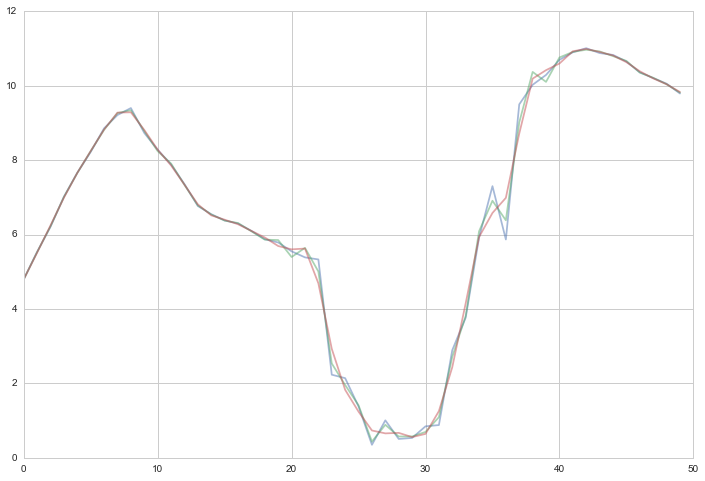

In [90]:
plt.figure(figsize=(12,8))
plt.plot(trip.Speed.iloc[0:50], alpha=0.5)
b, a = butter(2, 0.8)
speed = filtfilt(b, a, trip.Speed)
plt.plot(speed[0:50], alpha=0.5)
b, a = butter(2, 0.6)
speed = filtfilt(b, a, trip.Speed)
plt.plot(speed[0:50], alpha=0.5)

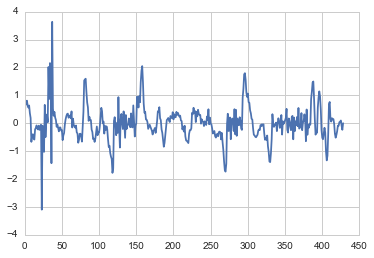

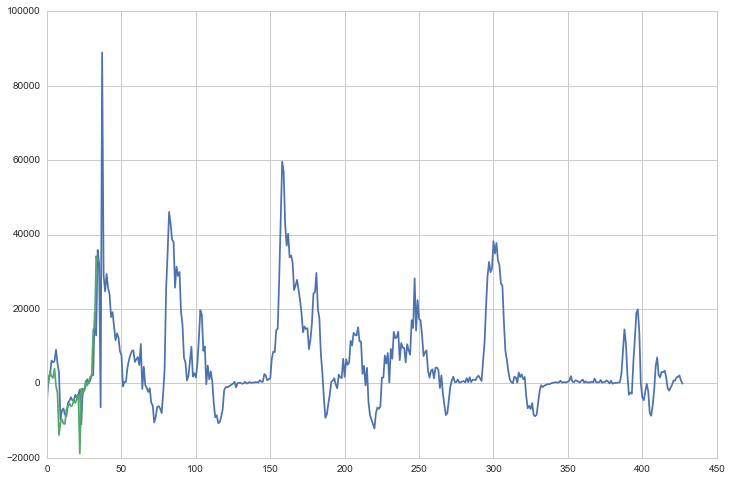

In [54]:
plt.subplot(111)
plt.plot(trip.Acceleration)
plt.figure(figsize=(12,8))
#plt.plot(trip.Power)
plt.plot(p)
plt.plot(rcpowers[:-1])

In [16]:
print len(rcpowers)
print len(p)

269
269


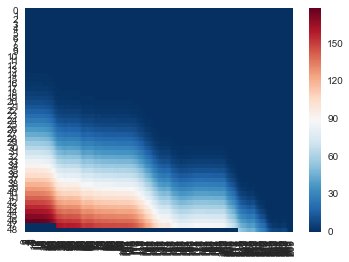

In [27]:
sns.heatmap(v.T[49:0:-1], linewidth=0, cmap='RdBu_r')

In [48]:
q[242][0]

array([ inf,  inf,  inf,  inf,  inf,  nan,  nan])

In [47]:
v[242][0]

inf

In [46]:
p[242]

24161.132735116331

In [18]:
sum([po < 0 for po in p])

51

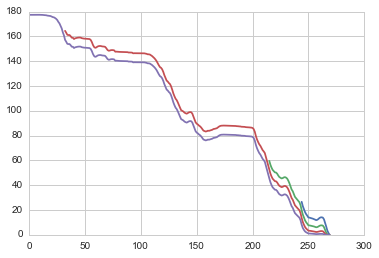

In [19]:
plt.plot(v.T[0:4].T)

In [12]:
v[1118,20]

IndexError: index 1118 is out of bounds for axis 0 with size 270

maybe interp1d with a inf in y values, one inf at 1137, and all before are now NAN, including at other SOCS.  no at 1136, 0 is nan but full soc still has value

one nan at the bottom is back propping up, ~1 soc per timestep from interpolation

check interp1d with nan values... check min q t is correct?

In [ ]:
v.T[48,1500]

In [ ]:
sum([a < 0 for a in trip.Acceleration])

In [ ]:
fig = plt.figure()
plt.plot(trip.Acceleration*2)